# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Krisna Adiwiguna]
- **Email:** [adiwigunak@gmail.com]
- **ID Dicoding:** [Krisna Adiwiguna]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?
- Bagaimana kondisi lingkungan mempengaruhi pengguna sepeda?
- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [66]:
# Library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Data Wrangling

### Gathering Data

In [67]:
# memuat tabel hari (day)
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
# memuat tabel jam (hour)
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [69]:
# memeriksa tipe data dari setiap kolom yang terdapat dalam hour_df dan dayy_df
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Cek Missing Value

In [70]:
# memeriksa keberadaan missing value di dataset hour_df
print("DataFrame Day:")
hour_df.isna().sum()

DataFrame Day:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [71]:
#  memeriksa keberadaan missing value di dataset day_df
print("DataFrame Hour:")
day_df.isna().sum()

DataFrame Hour:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Duplikasi Data

In [72]:
# memeriksa duplikasi
print("Jumlah Duplikasi (hour): ", hour_df.duplicated().sum())
print("Jumlah Duplikasi (day) : ", day_df.duplicated().sum())

Jumlah Duplikasi (hour):  0
Jumlah Duplikasi (day) :  0


Deskripsi Statistik

In [73]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [74]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Memperbaiki Tipe Data

In [75]:
# day_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
# hour_df
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [76]:
# cek data type untuk day_df dan hour_df
print('day_df["dteday"] : ', day_df["dteday"].dtypes)
print('hour_df["dteday"] : ', hour_df["dteday"].dtypes)

day_df["dteday"] :  datetime64[ns]
hour_df["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

In [77]:
# sample data day_df
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382
50,51,2011-02-20,1,0,2,0,0,0,1,0.285217,0.277330,0.407826,0.223235,639,1173,1812
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235


In [78]:
# sample data hour_df
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11809,11810,2012-05-12,2,1,5,6,0,6,0,1,0.42,0.4242,0.67,0.0896,10,23,33
2237,2238,2011-04-08,2,0,4,2,0,5,1,3,0.34,0.3333,0.76,0.1642,3,10,13
2675,2676,2011-04-26,2,0,4,9,0,2,1,1,0.64,0.6061,0.73,0.3582,35,164,199
1849,1850,2011-03-22,2,0,3,19,0,2,1,2,0.44,0.4394,0.54,0.2537,22,142,164
10139,10140,2012-03-03,1,1,3,13,0,6,0,1,0.44,0.4394,0.51,0.2836,87,252,339


In [79]:
# Mengsortir data day_df per musim
day_df.loc[day_df["season"] == 1, "season"] = "springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

<ipython-input-79-a9cbd230e8d8>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["season"] == 1, "season"] = "springer"


,count
season,
Fall,188
Summer,184
Winter,178
springer,181


Jumlah pengguna sepeda pada tahun 2011 dan 2012

In [80]:
# mencari jumlah pengguna Bike Sharing tahun 2011 dan 2012
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

<ipython-input-80-1d707e531e51>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["yr"] == 0, "yr"] = "2011"


,count
yr,
2011,365
2012,366


In [49]:
day_df.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


Jumlah penyewaan sepeda saat Hari Libur (Holiday) dan Hari biasa (Not Holiday)

In [84]:
# Ubah tipe kolom 'season' menjadi object
day_df["season"] = day_df["season"].astype(object)

# Jumlah pengguna Bike Sharing saat hari libur (holiday) dan hari biasa (weekdays/ not holiday)
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

,count
holiday,
Holiday,710
Not a Holiday,21


Pengklasifikasian penggunaan sepeda per hari

In [86]:
# Ubah tipe kolom 'weekday' menjadi object
day_df["weekday"] = day_df["weekday"].astype(object)

# Pengklasifikasian penggunaan sepeda per hari
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

,count
weekday,
Fri,104
Mon,105
Sat,105
Sun,105
Thu,104
Tue,104
Wed,104


Penggunaan sepeda saat hari kerja dan hari libur



In [87]:
# pengklasifikasian pengguna sepeda saat hari kerja dan hari libur
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

,count
workingday,
Holiday,231
Working Day,500


In [89]:
# Ubah tipe kolom 'weathersit' menjadi object
day_df["waethersit"] = day_df["weathersit"].astype(object)

# pengklasifikasian pengguna sepeda berdasarkan musim (cuaca)
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

,count
weathersit,
Clear,463
Light Snow,21
Mist + Cloudy,247


In [ ]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,Holiday,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,Holiday,Sun,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,Holiday,Mon,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,Holiday,Tue,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,Holiday,Wed,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,12,Holiday,Thu,Working Day,Mist + Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,12,Holiday,Fri,Working Day,Mist + Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,12,Holiday,Sat,Holiday,Mist + Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,12,Holiday,Sun,Holiday,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Visualization & Explanatory Analysis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?

In [ ]:
# Mengklasifikan data pengguna sepeda berdasarkan musim
byseason_df = day_df.groupby(by="weathersit").instant.nunique().reset_index()
byseason_df.rename(columns={"instant": "sum"}, inplace=True)
byseason_df

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


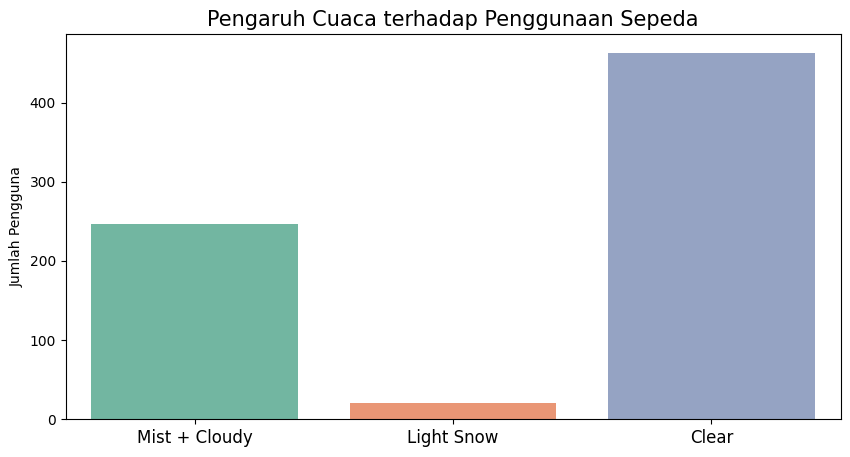

In [90]:
# Plot tabel data pengguna sepeda berdasarkan musim (cuaca)
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=byseason_df.sort_values(by="weathersit", ascending=False),
    palette="Set2",
    hue="weathersit",
    legend=False  # Tidak menampilkan legenda karena x sudah cukup menjelaskan
)
plt.title("Pengaruh Cuaca terhadap Penggunaan Sepeda", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

2. Bagaimana kondisi lingkungan mempengaruhi pengguna sepeda?


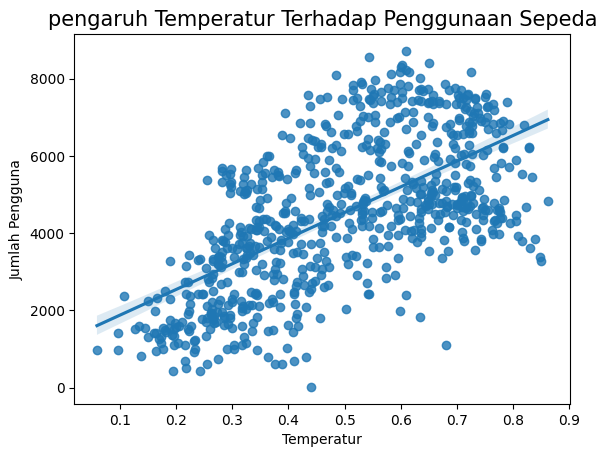

In [91]:
# Temperatur

sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.title("pengaruh Temperatur Terhadap Penggunaan Sepeda", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Temperatur")
plt.show()

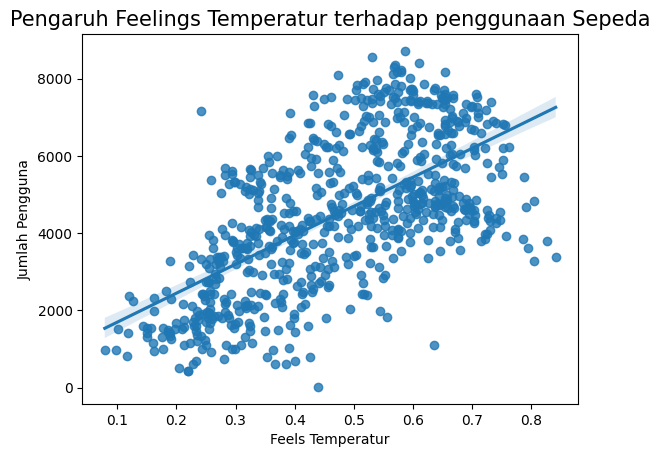

In [ ]:
# Berdasarkan feelings temperatur

sns.regplot(x=day_df["atemp"], y=day_df["cnt"])
plt.title("Pengaruh Feelings Temperatur terhadap penggunaan Sepeda", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Feels Temperatur")
plt.show()

3. Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [92]:
# mengklasifikasikan data pengguna sepeda berdasarkan hari kerja dan hari libur
byworkingday_df = day_df.groupby(by="workingday").instant.nunique().reset_index()
byworkingday_df.rename(columns={"instant": "sum"}, inplace=True)
byworkingday_df

,workingday,sum
0,Holiday,231
1,Working Day,500


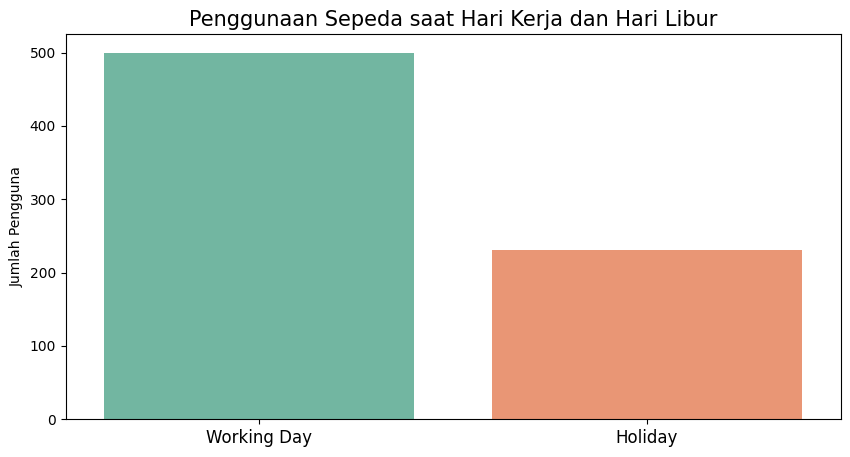

In [94]:
# Plot tabel data pengguna sepeda berdasarkan hari kerja dan hari libur
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=byworkingday_df.sort_values(by="workingday", ascending=False),
    palette="Set2",
    hue="workingday",  # Menambahkan hue untuk membedakan kategori
    legend=False       # Tidak perlu menampilkan legenda
)
plt.title("Penggunaan Sepeda saat Hari Kerja dan Hari Libur", loc="center", fontsize=15)
plt.ylabel("Jumlah Pengguna")
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()


In [ ]:
# Data bike sharing yang digunakan pada dashboard
day_df.to_csv("day_df.csv", index=False)

## Conclusion

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?
2. Bagaimana kondisi lingkungan mempengaruhi pengguna sepeda?
3. Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?





- Pada tabel yang menunjukkan pengaruh cuaca terhadap penggunaan sepeda, terlihat bahwa jumlah penyewaan tertinggi terjadi saat cuaca cerah. Cuaca yang cerah sangat mendukung aktivitas bersepeda karena kondisi yang nyaman. Sebaliknya, tidak ada penyewaan yang terjadi saat hujan lebat, karena kondisi tersebut dianggap berbahaya untuk bersepeda.
- Kondisi lingkungan, seperti suhu udara dan kecepatan angin, memiliki pengaruh signifikan terhadap penggunaan layanan bike sharing. Pengguna cenderung lebih memilih bersepeda saat cuaca tidak terlalu panas atau terlalu dingin. Selain itu, kecepatan angin juga berdampak, karena angin kencang dapat membahayakan keselamatan pengguna sepeda.
- Jumlah penyewaan sepeda pada hari kerja (working days) dua kali lebih banyak dibandingkan dengan hari libur (holidays). Hal ini menunjukkan bahwa layanan bike sharing lebih sering digunakan sebagai moda transportasi untuk bekerja daripada untuk kegiatan rekreasi di akhir pekan.**bold text**
